# Financial Planning


In [1]:
# Importing libraries and dependencies required
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
# Loading .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 17


True

## Part 1 - Personal Finance Planner

### Collecting Crypto Prices Using the `requests` Library

In [3]:
# Setting the current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Using the Python requests library, make an API call to access the current price of BTC and ETH

response_data_btc = requests.get(btc_url)
response_content_btc = response_data_btc.content
data_btc = response_data_btc.json()
print(json.dumps(data_btc, indent=4))

response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()

print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19347475,
            "total_supply": 19347475,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 30285.0,
                    "volume_24h": 10714808274,
                    "market_cap": 586153715584,
                    "percentage_change_1h": -0.197238857891911,
                    "percentage_change_24h": -0.515945534463254,
                    "percentage_change_7d": 8.28413062620305,
                    "percent_change_1h": -0.197238857891911,
                    "percent_change_24h": -0.515945534463254,
                    "percent_change_7d": 8.28413062620305
                },
                "CAD": {
                    "price": 41142.1725,
                    "volume_24h": 14556067040.229,
                  

In [6]:
# Fetching the current price
# Computing the current value of my crpto
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = my_eth * eth_value

# Printing the current crypto wallet balance
print(f"The current value of the {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of the {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of the 1.2 BTC is $36342.00
The current value of the 5.3 ETH is $11088.02


In [7]:
# Computing the total value of the cryptocurrency wallet
# Adding the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = my_btc_value + my_eth_value

# Printing current cryptocurrency wallet balance

print(f"Total crypto currency value is {total_crypto_wallet:,.2f} USD")

Total crypto currency value is 47,430.02 USD


### Collecting the Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Setting the Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Creating the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [10]:
# Formatting the current date as ISO format
today = pd.Timestamp("2023-04-14", tz="America/New_York").isoformat()

# Setting the tickers
tickers = ["AGG", "SPY"]

# Setting the timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
closing_prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = closing_prices_df[closing_prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = closing_prices_df[closing_prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
closing_prices_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
closing_prices_df.head()

AGG                                           \
                            open   high    low close   volume trade_count   
timestamp                                                                   
2023-04-14 04:00:00+00:00  99.56  99.59  99.32  99.4  4503010       19909   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-04-14 04:00:00+00:00  99.405533  412.81  415.09  410.06  412.46   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-04-14 04:00:00+00:00  75973321      573427  412.263399

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(closing_prices_df['AGG']['close'][0])
spy_close_price = float(closing_prices_df['SPY']['close'][0])

# Print AGG and SPY close prices
print(f'Closing price of AGG is {agg_close_price}')
print(f'Closing price of SPY is {spy_close_price}')

Closing price of AGG is 99.4
Closing price of SPY is 412.46


In [12]:
# Computing the current value of shares
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 
# Printing current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20623.00
The current value of your 200 AGG shares is $19880.00


In [13]:
# Calculating the total value of the stock and bond portion of the portfolio
total_stocks_bonds = my_spy_value + my_agg_value

# Printing the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(f"The current value of total stocks and bonds is {total_stocks_bonds:,.2f} USD")

The current value of total stocks and bonds is 40,503.00 USD


### Savings Health Analysis

In [14]:
# Setting the monthly household income
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]} 

# Creating a pandas DataFrame. 
df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 
# printing the data 
df_savings 

,amount
crypto,47430.024
shares,40503.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

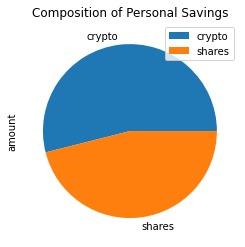

In [15]:
# Plotting savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [16]:
# Setting an ideal emergency fund
emergency_fund = monthly_income * 3

# Calculating the total amount of savings
total_savings = total_crypto + total_shares_value

# Validating saving health
if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")
              

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Setting the start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-04-14', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-04-14', tz='America/New_York').isoformat()

In [18]:
# Getting 5 years' worth of historical data for SPY and AGG
stock_data_df = alpaca.get_bars(
    tickers, 
    timeframe, 
    start_date, 
    end_date).df

# Reorganizing the DataFrame
# Separating ticker data
AGG = stock_data_df[stock_data_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = stock_data_df[stock_data_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenatnig the ticker DataFrames
stock_data_df = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Displaying sample data
stock_data_df.head()

AGG                                      \
                             open      high     low   close    volume   
timestamp                                                               
2018-04-16 04:00:00+00:00  106.64  106.8400  106.61  106.82   3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.75  106.85   2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.54  106.55   2231676   
2018-04-19 04:00:00+00:00  106.34  106.3899  106.24  106.29  10985057   
2018-04-20 04:00:00+00:00  106.15  106.2400  106.00  106.00   2766030   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-04-16 04:00:00+00:00       13789  106.777580  267.00  268.20  266.07   
2018-04-17 04:00:00+00:00        9268  106.843189  269.33  270.87  268.75   
2018-04-18 04:00:00+00:00        9647  106.639143  270.69  271.30  269.87   
2018-04-19 04:00:00+00:00       20047  106.302239  269.65  269.88  267.72   
2018-04-20 04:00:00+00:00       11007  106.117094  268.81  269.06  265.61   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-04-16 04:00:00+00:00  267.37   63625287      251422  267.298482  
2018-04-17 04:00:00+00:00  270.13   64886136      253683  269.795896  
2018-04-18 04:00:00+00:00  270.37   58608057      197540  270.674441  
2018-04-19 04:00:00+00:00  268.87   77712909      284593  268.787580  
2018-04-20 04:00:00+00:00  266.66  100513533      292033  267.286647

In [19]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = stock_data_df, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252*30)

In [20]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high     low   close    volume   
timestamp                                                               
2018-04-16 04:00:00+00:00  106.64  106.8400  106.61  106.82   3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.75  106.85   2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.54  106.55   2231676   
2018-04-19 04:00:00+00:00  106.34  106.3899  106.24  106.29  10985057   
2018-04-20 04:00:00+00:00  106.15  106.2400  106.00  106.00   2766030   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-04-16 04:00:00+00:00       13789  106.777580          NaN  267.00   
2018-04-17 04:00:00+00:00        9268  106.843189     0.000281  269.33   
2018-04-18 04:00:00+00:00        9647  106.639143    -0.002808  270.69   
2018-04-19 04:00:00+00:00       20047  106.302239    -0.002440  269.65   
2018-04-20 04:00:00+00:00       11007  106.117094    -0.002728  268.81   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-04-16 04:00:00+00:00  268.20  266.07  267.37   63625287      251422   
2018-04-17 04:00:00+00:00  270.87  268.75  270.13   64886136      253683   
2018-04-18 04:00:00+00:00  271.30  269.87  270.37   58608057      197540   
2018-04-19 04:00:00+00:00  269.88  267.72  268.87   77712909      284593   
2018-04-20 04:00:00+00:00  269.06  265.61  266.66  100513533      292033   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-04-16 04:00:00+00:00  267.298482          NaN  
2018-04-17 04:00:00+00:00  269.795896     0.010323  
2018-04-18 04:00:00+00:00  270.674441     0.000888  
2018-04-19 04:00:00+00:00  268.787580    -0.005548  
2018-04-20 04:00:00+00:00  267.286647    -0.008220

In [21]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/victormieres/Desktop/Personal-Finance-Planer-Retirement-Planing/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006301,0.994461,0.987607,0.986983,1.002368,1.003387,0.998754,1.011723,1.005363,0.995357,...,0.997416,0.994610,1.000980,0.992244,0.995404,0.997915,1.003808,0.986207,0.997217,0.992567
2,1.016825,1.014329,0.988636,0.973931,1.005675,1.002246,0.989736,1.003638,1.005530,0.991235,...,1.006122,1.007066,1.008794,0.992889,0.998654,0.995119,0.998646,0.982068,0.994080,0.991009
3,1.018246,1.014465,0.991758,0.970875,0.996300,1.027838,0.983936,1.016935,1.001988,0.984772,...,1.007252,1.008116,1.017736,0.998109,1.005306,0.996421,0.980428,0.968335,0.999828,0.997726
4,1.021099,1.016664,0.980446,0.970565,0.998797,1.022403,0.972738,1.009364,0.991322,0.982491,...,1.010274,0.995206,1.024514,0.986549,1.005437,1.006247,0.985035,0.965434,1.004600,1.005277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.344932,1.912882,3.622531,2.055578,1.116691,5.979532,1.901758,3.582107,7.780914,1.318274,...,4.700260,4.635957,5.863172,2.765024,1.167061,5.695266,4.374293,1.142022,2.190829,1.404713
7557,3.353061,1.894050,3.631070,2.066774,1.118921,5.946125,1.907200,3.617496,7.727968,1.310737,...,4.729785,4.561184,5.837533,2.763714,1.170715,5.653285,4.378246,1.157339,2.221683,1.408048
7558,3.332927,1.881863,3.649841,2.039735,1.110514,5.961794,1.943454,3.578716,7.774584,1.322571,...,4.756789,4.576375,5.815664,2.764769,1.165139,5.650048,4.376719,1.158089,2.235930,1.404059
7559,3.353941,1.884251,3.618334,2.060129,1.118803,6.024162,1.929091,3.545217,7.746528,1.324549,...,4.798329,4.560688,5.871192,2.764873,1.168139,5.684024,4.441542,1.153352,2.207706,1.408521


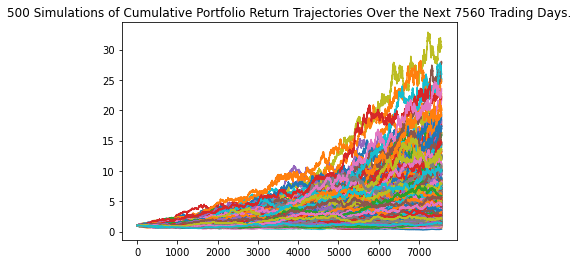

In [22]:
# Plotting the simulation outcomes
line_plot = MC_even_dist.plot_simulation()

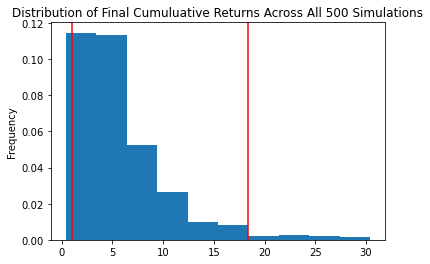

In [23]:
# Plotting the probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [24]:
# Fetching summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()
# Printing the summary statistics
print(even_tbl)

count           500.000000
mean              5.810894
std               4.536275
min               0.409754
25%               2.768746
50%               4.581256
75%               7.241742
max              30.407236
95% CI Lower      1.058469
95% CI Upper     18.325008
Name: 7560, dtype: float64


### Calculating the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [25]:
# Setting a initial investment
initial_investment = 20000
# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)
# Printing the results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $21169.38 and $366500.15


### Calculating the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [26]:
# Setting initial investment
initial_investment = 20000 * 1.5
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)
# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $31754.07 and $549750.23


## Early Retirement calculation


### Five Years Retirement Option

In [27]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five = MCSimulation(portfolio_data = stock_data_df, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                      \
                             open      high     low   close    volume   
timestamp                                                               
2018-04-16 04:00:00+00:00  106.64  106.8400  106.61  106.82   3860890   
2018-04-17 04:00:00+00:00  106.81  106.8899  106.75  106.85   2362997   
2018-04-18 04:00:00+00:00  106.74  106.7510  106.54  106.55   2231676   
2018-04-19 04:00:00+00:00  106.34  106.3899  106.24  106.29  10985057   
2018-04-20 04:00:00+00:00  106.15  106.2400  106.00  106.00   2766030   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-04-16 04:00:00+00:00       13789  106.777580          NaN  267.00   
2018-04-17 04:00:00+00:00        9268  106.843189     0.000281  269.33   
2018-04-18 04:00:00+00:00        9647  106.639143    -0.002808  270.69   
2018-04-19 04:00:00+00:00       20047  106.302239    -0.002440  269.65   
2018-04-20 04:00:00+00:00       11007  106.117094    -0.002728  268.81   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-04-16 04:00:00+00:00  268.20  266.07  267.37   63625287      251422   
2018-04-17 04:00:00+00:00  270.87  268.75  270.13   64886136      253683   
2018-04-18 04:00:00+00:00  271.30  269.87  270.37   58608057      197540   
2018-04-19 04:00:00+00:00  269.88  267.72  268.87   77712909      284593   
2018-04-20 04:00:00+00:00  269.06  265.61  266.66  100513533      292033   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-04-16 04:00:00+00:00  267.298482          NaN  
2018-04-17 04:00:00+00:00  269.795896     0.010323  
2018-04-18 04:00:00+00:00  270.674441     0.000888  
2018-04-19 04:00:00+00:00  268.787580    -0.005548  
2018-04-20 04:00:00+00:00  267.286647    -0.008220

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/victormieres/Desktop/Personal-Finance-Planer-Retirement-Planing/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.


In [ ]:
# Plotting the simulation outcomes
line_plot_five = MC_even_dist_five.plot_simulation()

In [ ]:
# Plotting the probability distribution and confidence intervals
dist_plot_five = MC_even_dist_five.plot_distribution()

In [ ]:
# Fetching summary statistics from the Monte Carlo simulation results
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Printing the summary statistics
print(even_tbl_five)

In [ ]:
# Setting an initial investment
initial_investment_five = 60000
# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)
# Printing the results
print(f"There is a 95% chance that an initial investment of ${initial_investment_five} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten = MCSimulation(portfolio_data = stock_data_df, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_ten.calc_cumulative_return()

In [ ]:
# Plotting the simulation outcomes
line_plot_ten = MC_even_dist_ten.plot_simulation()

In [ ]:
# Ploting the probability distribution and confidence intervals
dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [ ]:
# Fetching summary statistics from the Monte Carlo simulation results
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Printing the summary statistics
print(even_tbl_ten)

In [ ]:
# Setting an initial investment
initial_investment_ten = 60000
# Using the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Printing results
print(f"There is a 95% chance that an initial investment of ${initial_investment_ten} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")